In [383]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [385]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [387]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of numerical values 

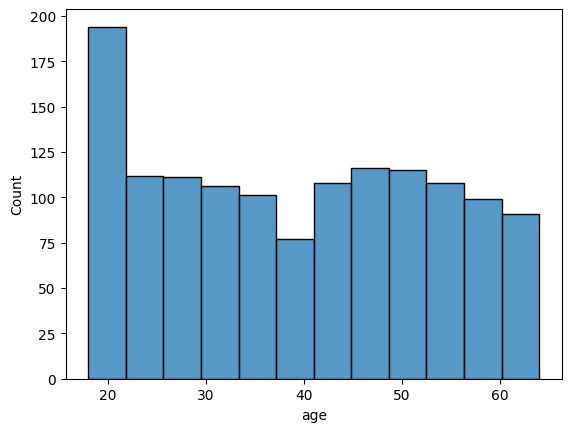

In [388]:
sns.histplot(data=data, x='age')
plt.show()

We have a normal distribution between 18 and 64 years old.

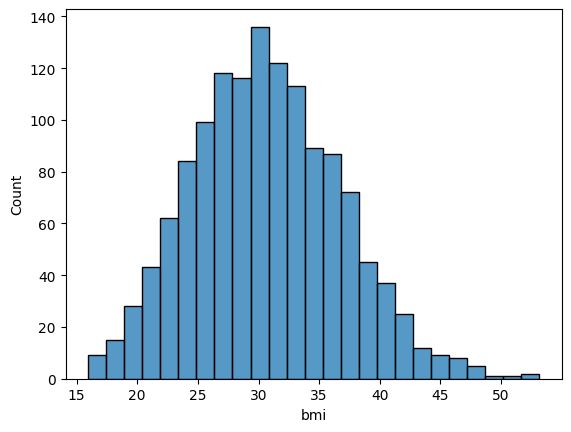

In [389]:
sns.histplot(data=data, x='bmi')
plt.show()

A bell distribution ! between 15 and 53. BMI stands for Body Mass Index It's commonly used as an indicator of whether someone is underweight, normal weight, overweight, or obese.
Underweight: BMI less than 18.5
Normal weight: BMI between 18.5 and 24.9
Overweight: BMI between 25 and 29.9
Obesity: BMI 30 or higher

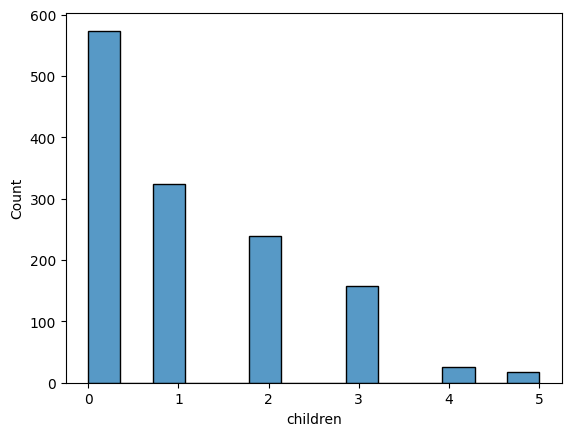

In [390]:
sns.histplot(data=data, x='children')
plt.show()

0 kid is the most representated the second one is One maybe because the Average Age is 39 so still young.

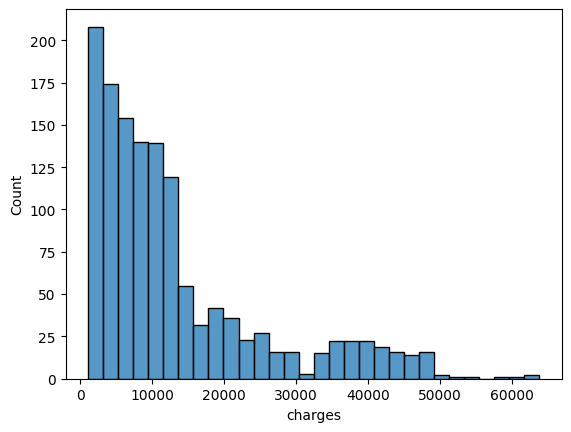

In [391]:
sns.histplot(data=data, x='charges')
plt.show()

most of people have a  billed between 1121 dollars  and around 1000 dollars.

In [392]:
smoker_frequency = data['smoker'].value_counts()
print(smoker_frequency)

smoker
no     1064
yes     274
Name: count, dtype: int64


Text(0, 0.5, 'Fréquency')

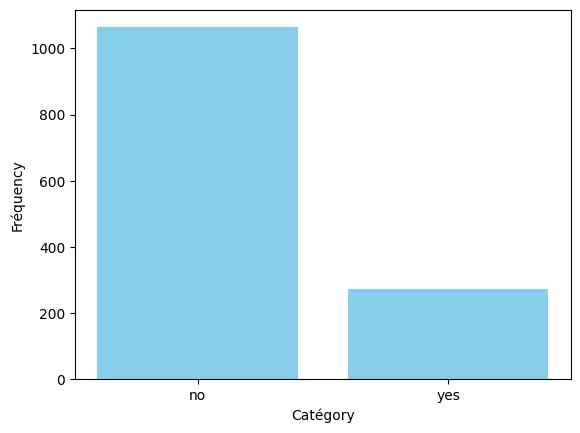

In [393]:

category_smoker = smoker_frequency.index
frequency_smoker = smoker_frequency.values

plt.bar(category_smoker, frequency_smoker, color='skyblue')
plt.xlabel('Catégory')
plt.ylabel('Fréquency')


We can see that there are more smokers 

In [394]:
region_frequency = data['region'].value_counts()
print(region_frequency)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Text(0, 0.5, 'Fréquency')

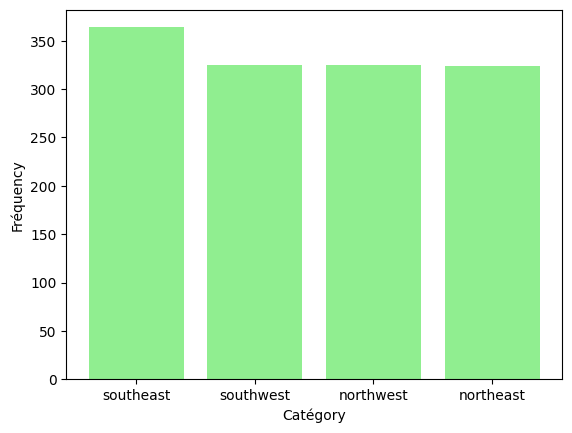

In [395]:
category_region = region_frequency.index
frequency_region = region_frequency.values

# Créez un graphique à barres
plt.bar(category_region, frequency_region, color='lightgreen')

# Ajoutez des étiquettes et un titre
plt.xlabel('Catégory')
plt.ylabel('Fréquency')


the most represented region is southeast followed by the others

In [396]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [397]:
np.corrcoef(data['age'], data['bmi'])

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [398]:
np.corrcoef(data['charges'], data['bmi'])

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

In [399]:
np.corrcoef(data['age'], data['charges'])

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [400]:
np.corrcoef(data['children'], data['charges'])

array([[1.        , 0.06799823],
       [0.06799823, 1.        ]])

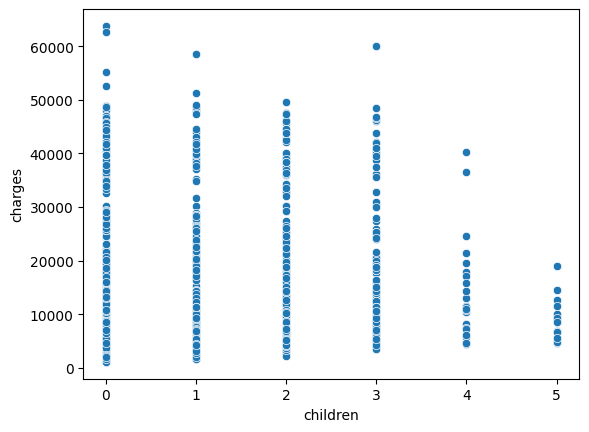

In [401]:
sns.scatterplot(data=data, x="children", y="charges")
plt.show()

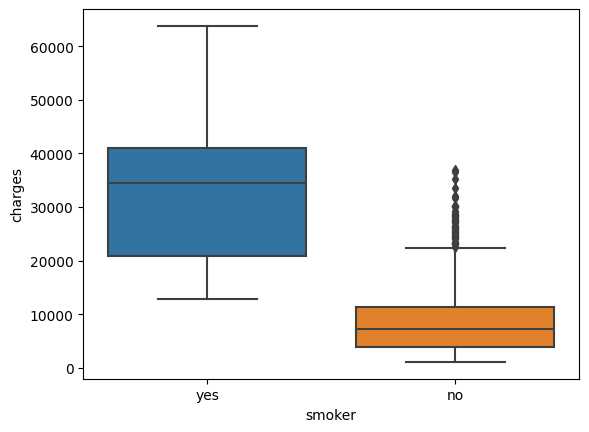

In [402]:
ax = sns.boxplot(data = data, x = 'smoker', y = 'charges')


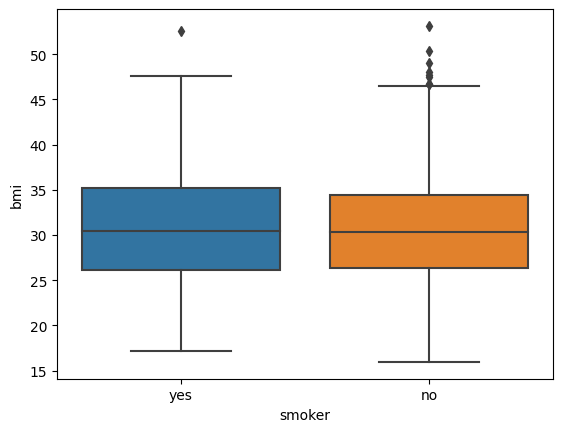

In [403]:
ax = sns.boxplot(data = data, x = 'smoker', y = 'bmi')

<Axes: xlabel='bmi'>

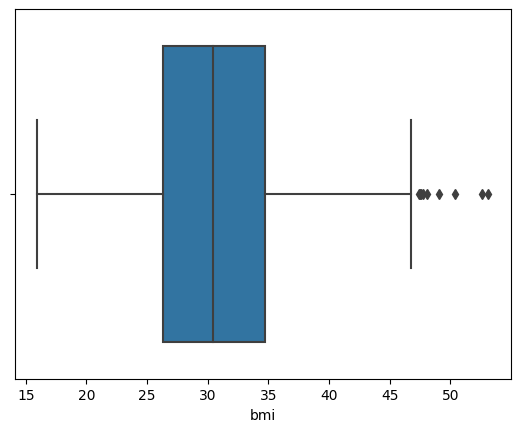

In [404]:
sns.boxplot(data=data, x="bmi")

BMI > 40 is called massive obesity 

In [405]:
def detect_outliers_iqr(data, column):
    Q1 = data['bmi'].quantile(0.25)
    Q3 = data['bmi'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(data, 'bmi')

# Afficher les outliers
print("Outliers:")
print(outliers)

Outliers:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


<Axes: xlabel='charges'>

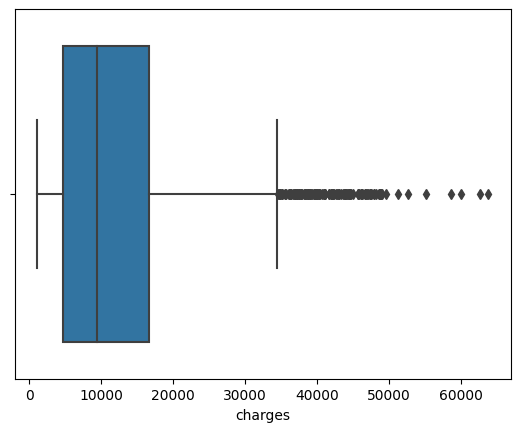

In [406]:
sns.boxplot(data=data, x="charges")

In [407]:
def detect_outliers_iqr(data, column):
    Q1 = data['charges'].quantile(0.25)
    Q3 = data['charges'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(data, 'charges')

# Afficher les outliers
print("Outliers:")
print(outliers)

Outliers:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


Pre processing

In [408]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [409]:
data['sex'] = data['sex'].str.strip()
data['region'] = data['region'].str.strip()
data['smoker'] = data['smoker'].str.strip()
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [410]:
print(data['smoker'].unique())

['yes' 'no']


In [411]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [412]:
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520


In [413]:
#one hot encoding 
df_encoded = pd.get_dummies(data, columns=['sex'], dtype=int)



In [414]:
df_encoded.head(5)

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,1,16884.92400,1,0
1,18,33.770,1,0,2,1725.55230,0,1
2,28,33.000,3,0,2,4449.46200,0,1
3,33,22.705,0,0,3,21984.47061,0,1
4,32,28.880,0,0,3,3866.85520,0,1


In [415]:
#randomize data
df_encoded = df_encoded.sample(frac=1, random_state=1).reset_index(drop=True)
df_encoded.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,35.53,0,0,3,1646.4297,0,1
1,57,31.54,0,0,3,11353.2276,0,1
2,51,37.00,0,0,1,8798.5930,0,1
3,49,36.63,3,0,2,10381.4787,1,0
4,21,22.30,1,0,1,2103.0800,0,1


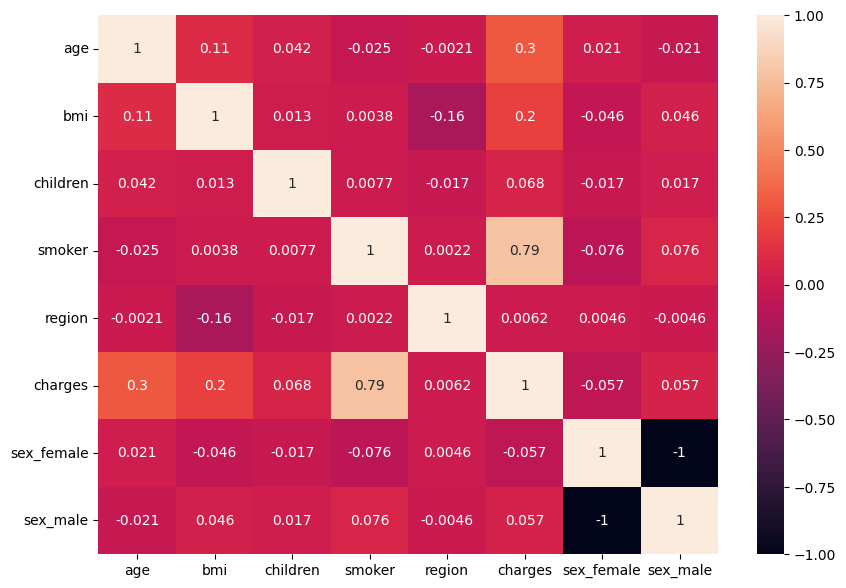

In [416]:
plt.figure(figsize=(10,7))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [417]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [418]:
y = df_encoded['charges']
X = df_encoded.drop(columns=['charges'])


In [419]:
#splitting data into train set et test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1070, 7)
(268, 7)


In [420]:
linreg = LinearRegression()

In [421]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [425]:
from sklearn.metrics import r2_score

In [426]:
print("R2 score : ", r2_score(y_test, pred))

R2 score :  0.7458069310520388


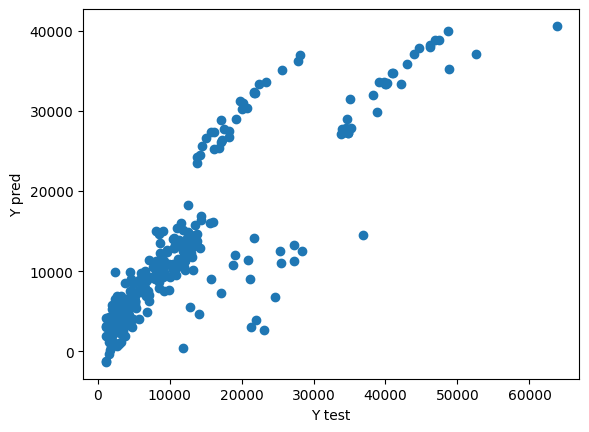

In [424]:
plt.scatter(y_test, pred)
plt.xlabel("Y test")
plt.ylabel("Y pred")
plt.show()